<a href="https://colab.research.google.com/github/sarker2018/VIsaualisation/blob/main/R_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scatter Plot with time evolution


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


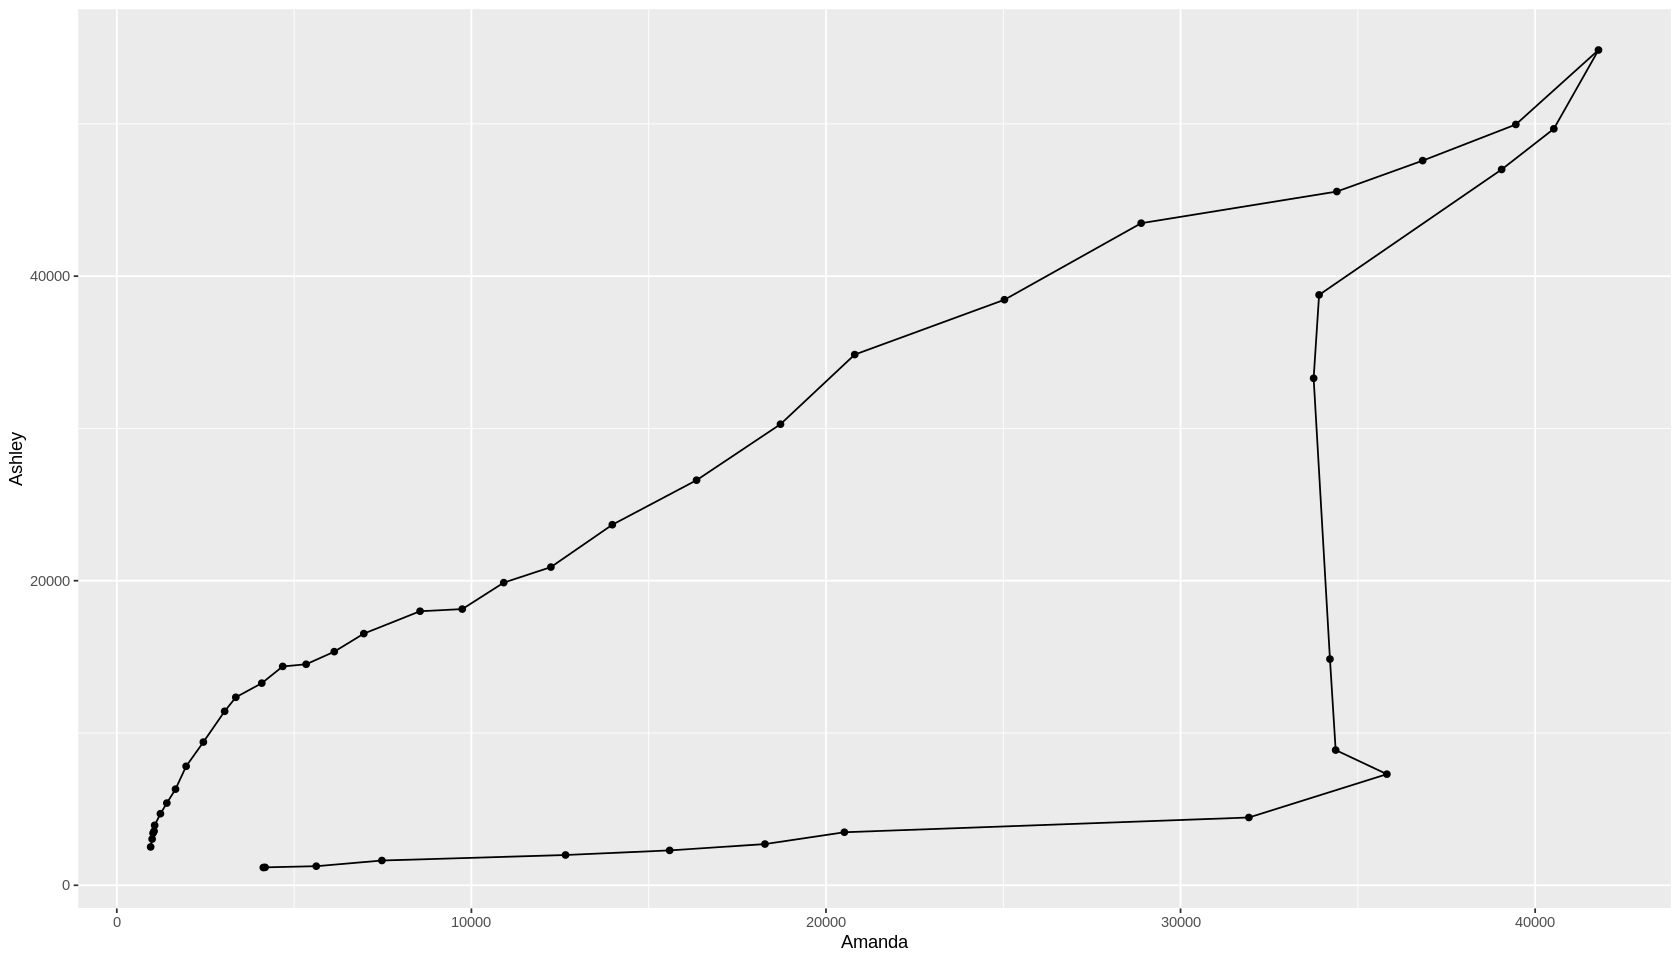

In [15]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)

# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# plot

# Define your custom plot size
options(repr.plot.width = 14, repr.plot.height = 8)
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point() +
     geom_segment(aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  )
      ) 

In [20]:
install.packages('hrbrthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


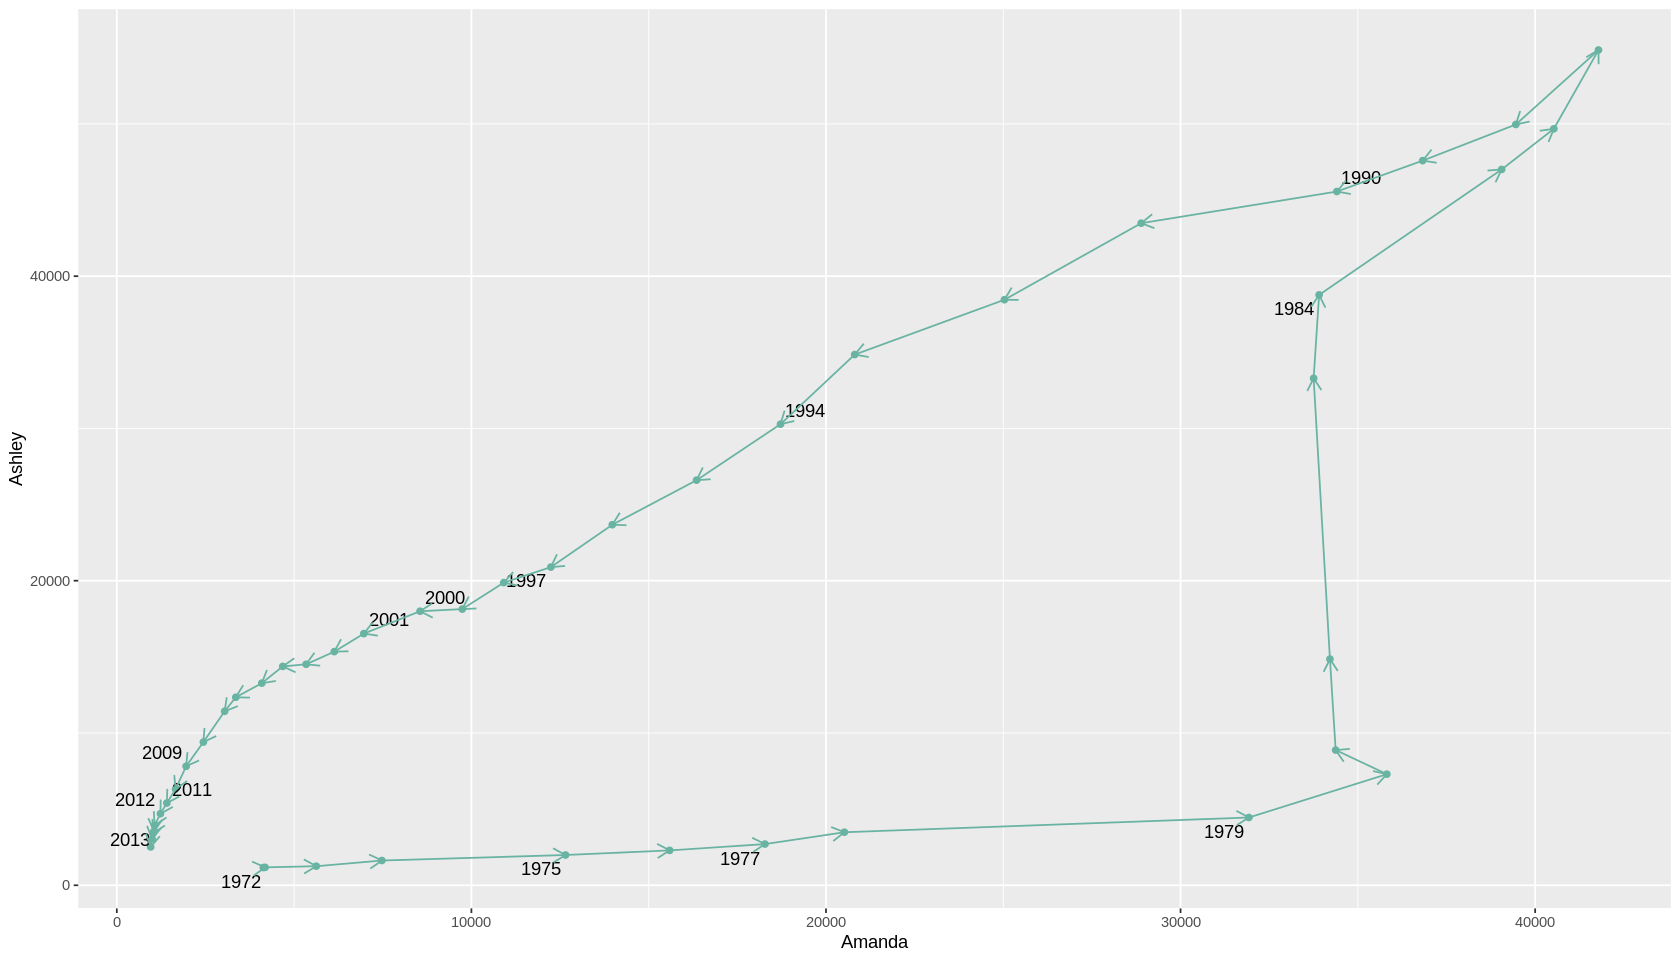

In [23]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)


# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# Select a few date to label the chart
tmp_date <- data %>% sample_frac(0.3)

# plot 
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point(color="#69b3a2") +
     geom_text_repel(data=tmp_date) +
     geom_segment(color="#69b3a2", 
                  aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  ),
                  arrow=arrow(length=unit(0.3,"cm"))
      ) 
      

## Mirror Histogram

* The following code only runs on the RStudio with local machine. Google colab does not provide the  `hrbrthemes` library till now. So, if you want to create a mirror histogram, you hav to use local machine 

```r
install.packages('hrbrthemes')
library(ggplot2)
library(hrbrthemes)

# Dummy data
data <- data.frame(
  var1 = rnorm(1000),
  var2 = rnorm(1000, mean=2)
)

# Chart
plot <- ggplot(data, aes(x=x) ) +
  # Top
  geom_density( aes(x = var1, y = ..density..), fill="#69b3a2" ) +
  geom_label( aes(x=4.5, y=0.25, label="variable1"), color="#69b3a2") +
  # Bottom
  geom_density( aes(x = var2, y = -..density..), fill= "#404080") +
  geom_label( aes(x=4.5, y=-0.25, label="variable2"), color="#404080") +
  theme_ipsum() +
  xlab("value of x")


```



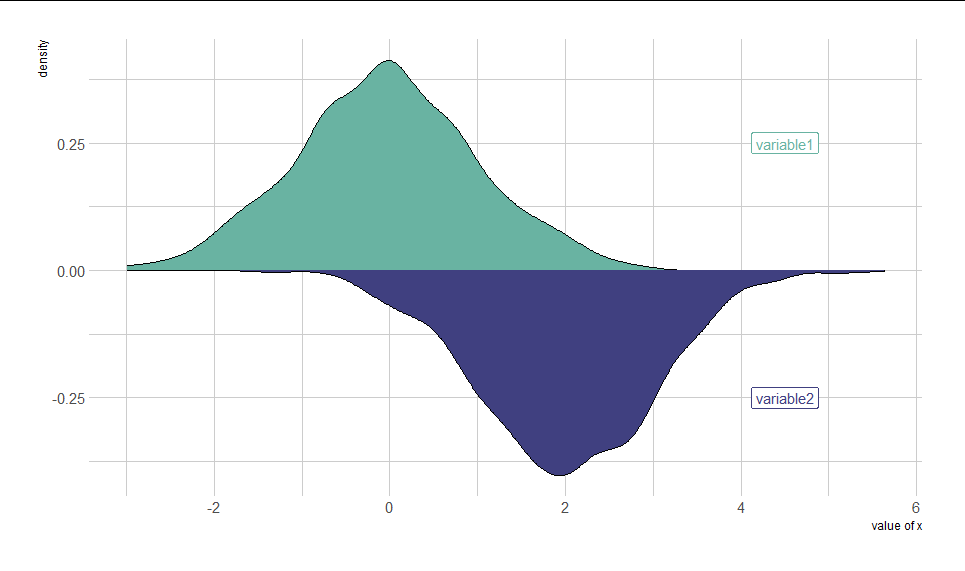

## Multifacet Histogram

* The following code only runs on the RStudio with local machine. Google colab does not provide the  `hrbrthemes` library till now. So, if you want to create a mirror histogram, you hav to use local machine 


```r

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(forcats)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")
data <- data %>%
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0))

# plot
plot <- data %>%
  mutate(text = fct_reorder(text, value)) %>%
  ggplot( aes(x=value, color=text, fill=text)) +
  geom_histogram(alpha=0.6, binwidth = 5) +
  scale_fill_viridis(discrete=TRUE) +
  scale_color_viridis(discrete=TRUE) +
  theme_ipsum() +
  theme(
    legend.position="none",
    panel.spacing = unit(0.1, "lines"),
    strip.text.x = element_text(size = 8)
  ) +
  xlab("") +
  ylab("Assigned Probability (%)") +
  facet_wrap(~text)

plot
```


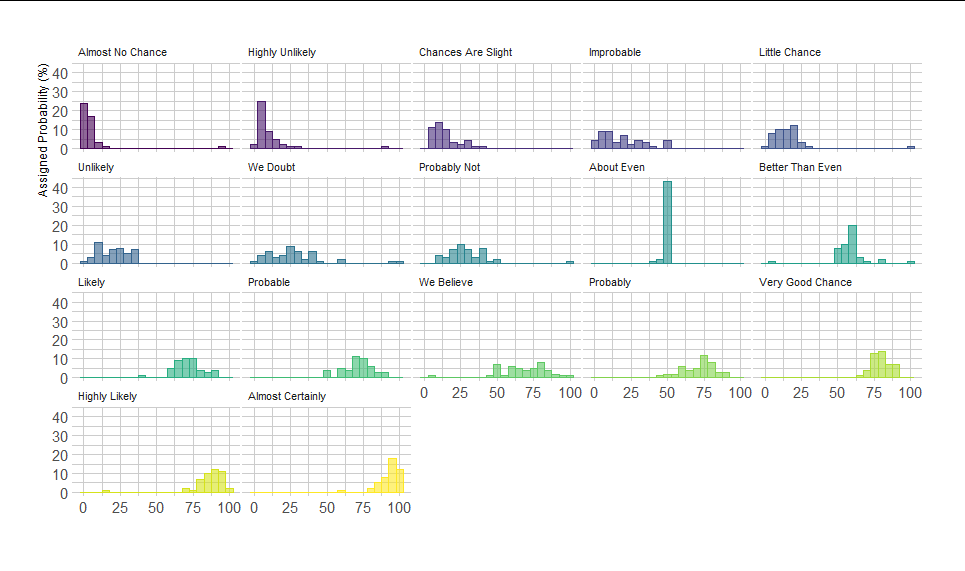

## Box plots

### What a box plot tells?

A boxplot gives a nice summary of one or more numeric variables. A boxplot is composed of several elements:

* The line that divides the box into 2 parts represents the median of the data. If the median is 10, it means that there are the same number of data points below and above 10.
* The ends of the box shows the upper (Q3) and lower (Q1) quartiles. If the third quartile is 15, it means that 75% of the observation are lower than 15.
* The difference between Quartiles 1 and 3 is called the interquartile range (IQR)
* The extreme line shows Q3+1.5xIQR to Q1-1.5xIQR (the highest and lowest value excluding outliers).
* Dots (or other markers) beyond the extreme line shows potntial outliers.

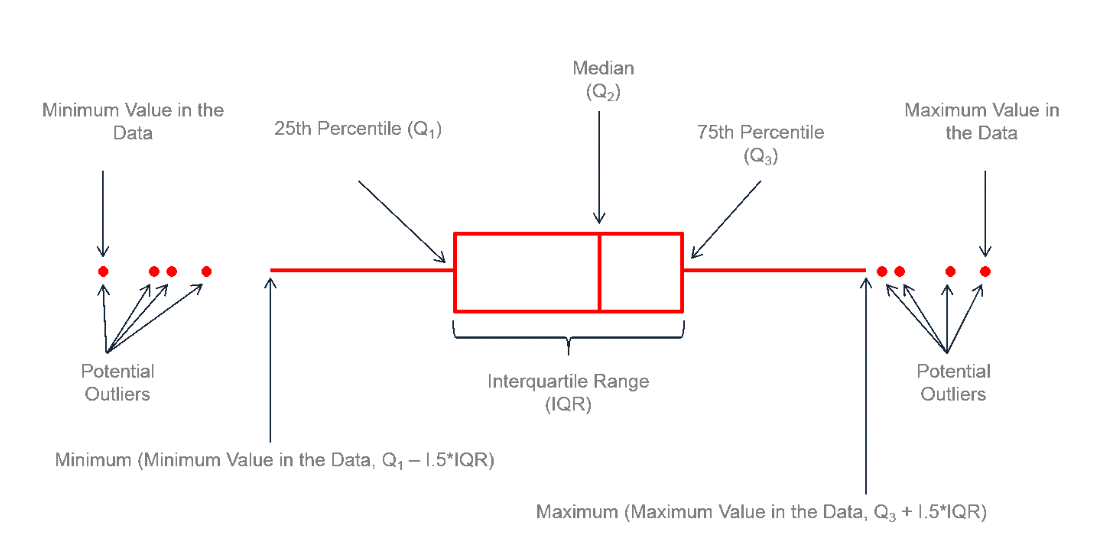

### Box plot with jitter

* Need to be run on the local machine


```r
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# Plot
data %>%
  ggplot( aes(x=name, y=value, fill=name)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A boxplot with jitter") +
    xlab("")
```

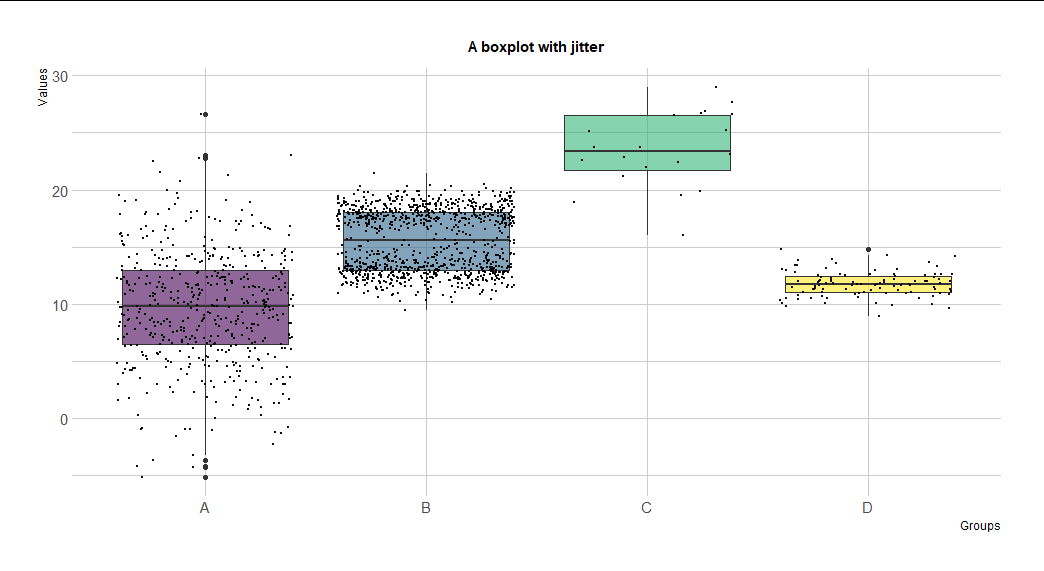

### Box plot multiple groups & level with facets

```r


```

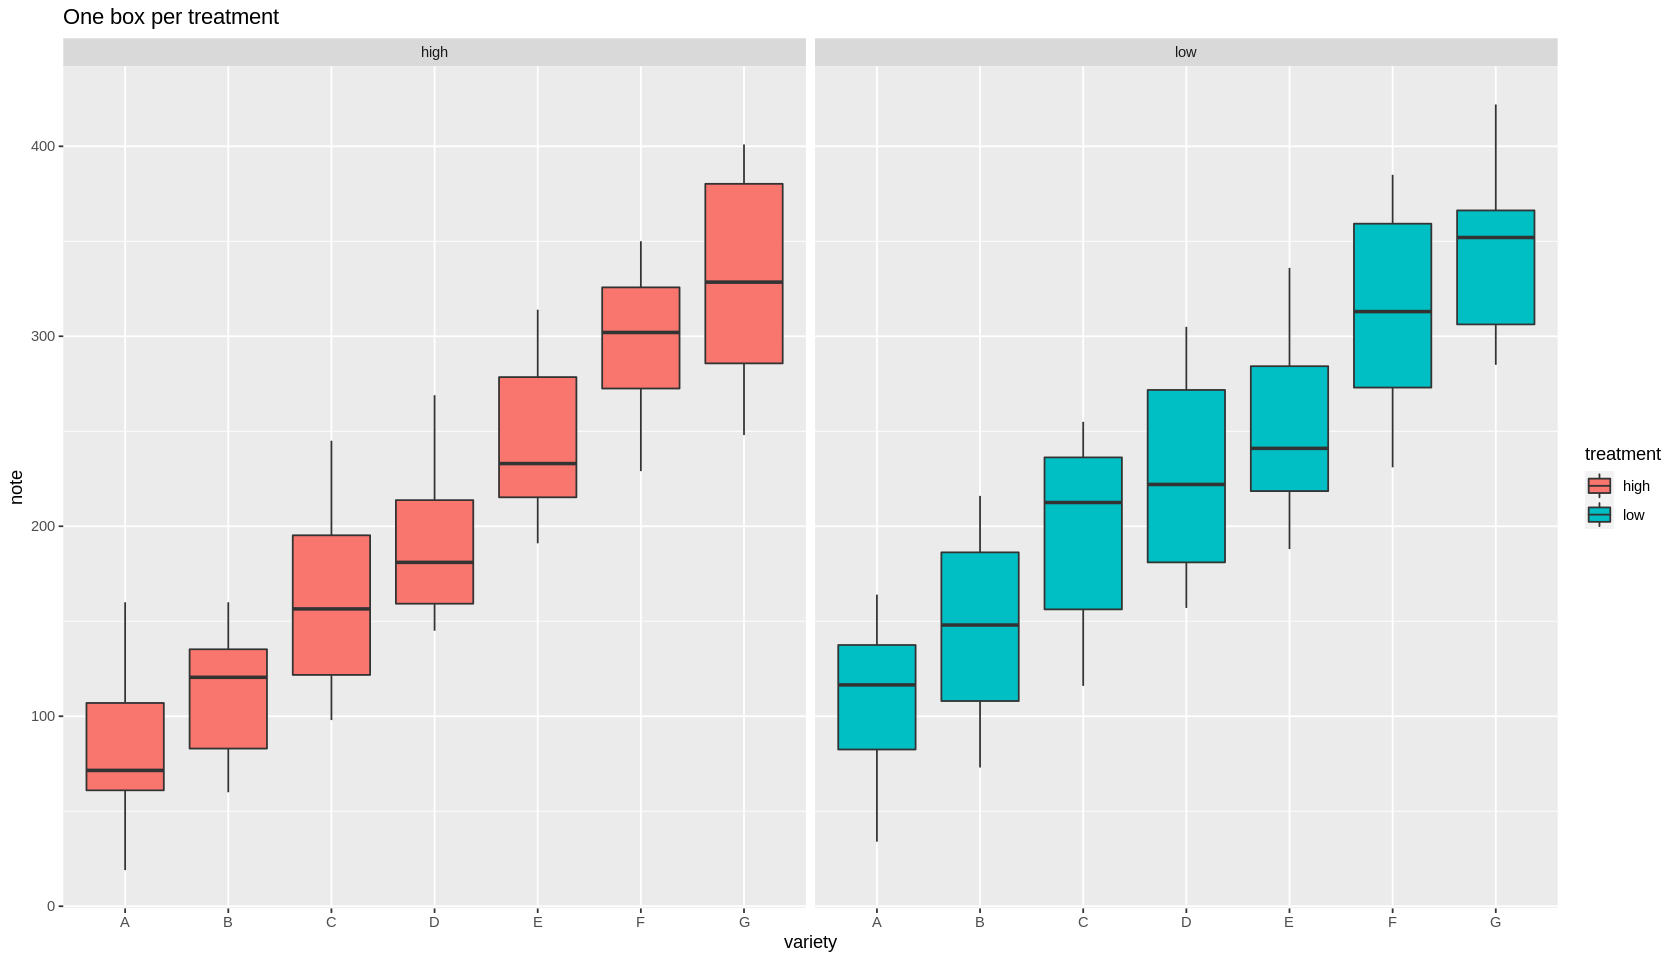

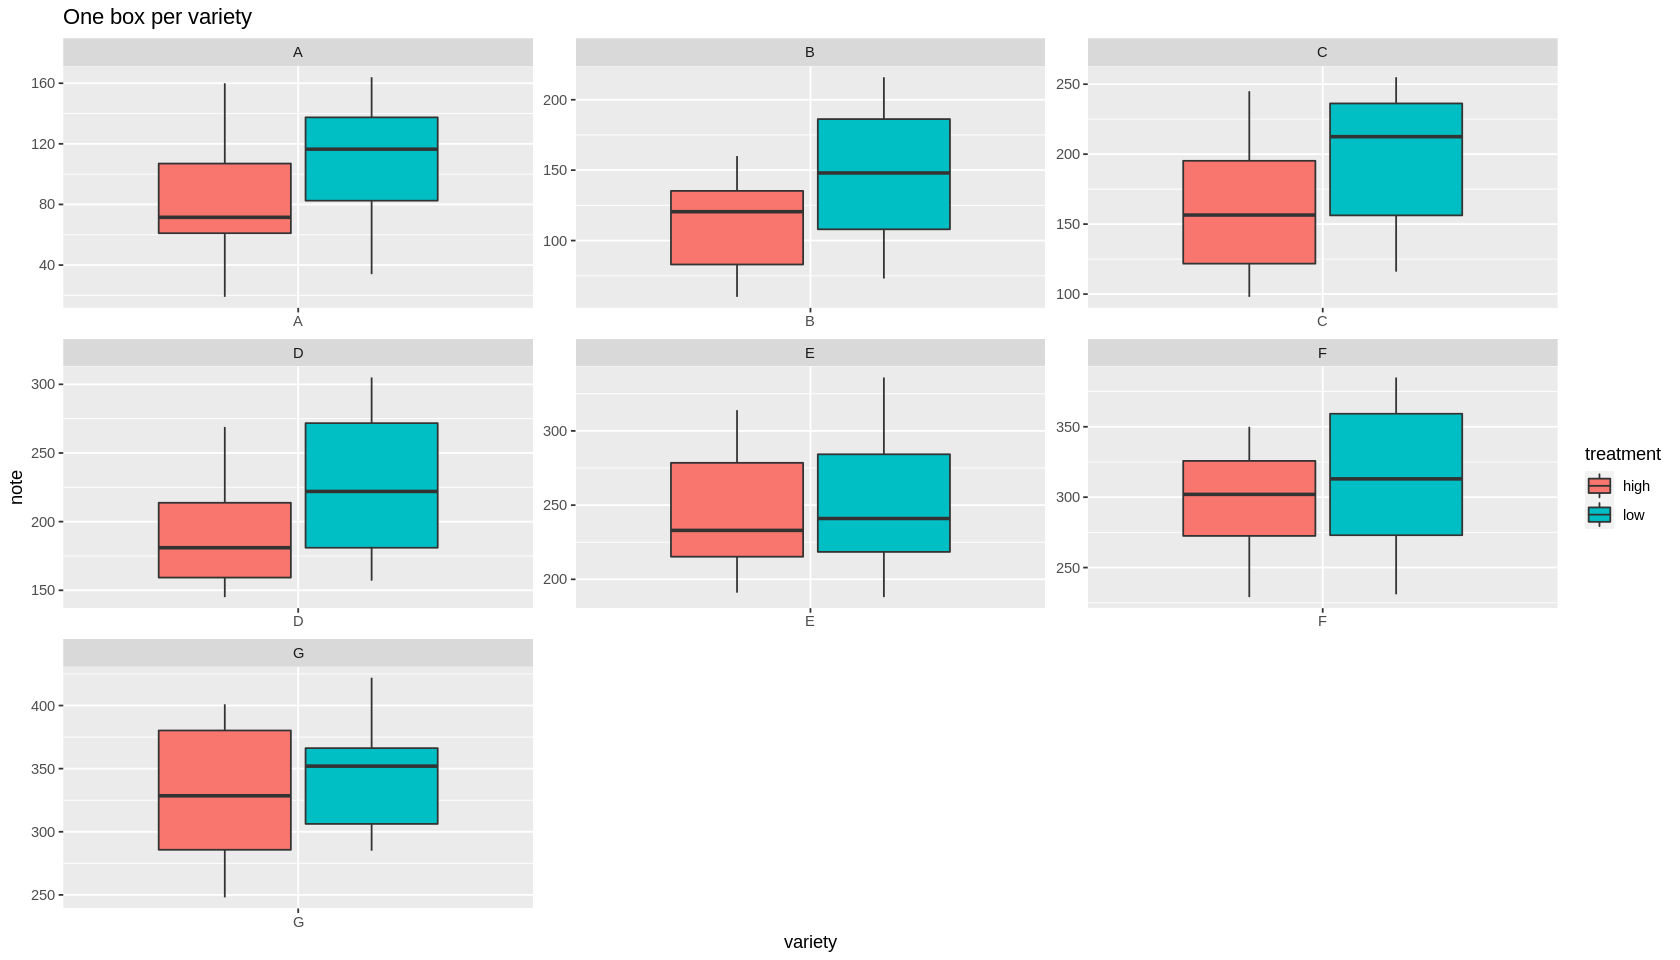

In [37]:
library(ggplot2)

# create a data frame
variety=rep(LETTERS[1:7], each=40)
treatment=rep(c("high","low"),each=20)
note=seq(1:280)+sample(1:150, 280, replace=T)
data=data.frame(variety, treatment ,  note)


options(repr.plot.width = 14, repr.plot.height = 8)
# One box per treatment
p1 <- ggplot(data, aes(x=variety, y=note, fill=treatment)) + 
  geom_boxplot() +
  facet_wrap(~treatment)+
  ggtitle("One box per treatment")

# one box per variety
p2 <- ggplot(data, aes(x=variety, y=note, fill=treatment)) + 
  geom_boxplot() +
  facet_wrap(~variety, scale="free")+
  ggtitle("One box per variety")

p1 
p2

In [39]:
# Create dummy data
data <- data.frame(
  cond = rep(c("condition_1", "condition_2"), each=10), 
  my_x = 1:100 + rnorm(100,sd=9), 
  my_y = 1:100 + rnorm(100,sd=16) 
)
data

cond,my_x,my_y
<chr>,<dbl>,<dbl>
condition_1,-1.934879,10.9936338
condition_1,-1.623201,-2.9479026
condition_1,-3.006074,7.9840633
condition_1,1.034391,11.0774161
condition_1,17.698990,8.7024268
condition_1,8.579571,26.0537526
condition_1,20.094359,10.9227661
condition_1,4.685464,10.7412970
condition_1,1.171375,0.4276704
